# Exercise 1: Question (25p)

### Part (a) – Image Sharpening
- Sharpen **soccerteam.jpeg** (blurry image).
- Include:
  - Description of the sharpening technique(s) used.
  - Demonstration of the result (before vs. after).
  - Python script or pseudocode for ImageJ.

---

### Part (b) – Canny Filter
- **What is a Canny filter?**  
  Provide a short description.
- **Identification:**  
  Decide which result is from the sharpened image and which from the original.
- **Experiment:**  
  Apply Canny filter on both the original and sharpened images with **3 different sigma values**.  
  - Compare and discuss observations.
- **Deliverables:**  
  - Include resulting images.
  - Include Python script/pseudocode.

---


## Table of contents
- <a href='#E1a'>Exercise 1</a>
    - <a href='#E1a'>Exercise 1 (a): Sharpening the image</a>
    - <a href='#E1b'>Exercise 1 (b): Canny filter on sharpened & unsharpened image </a>


--------------------------------------------------------------------------------------------
## Solution starts here
--------------------------------------------------------------------------------------------

# <font color='blue '>Exercise 1 (a): Sharpening the image <font> <a id='E1a'></a>

### Techniques used for sharpening the image:
    
Sharpening is the process of enhancing the contrast and intensity between the edges and the background of an image and thus making it seem sharper. Since the sharpening effect on the whole image will be difficult to notice without zooming in, I have cropped the image and focused on the player where the jersey number was visible. It also helped in understanding how the sharpening worked on numbers present in the image.
    
For sharpening the image, I have used 4 filters/masks which belonged to 2 types:
 - Single-step sharpening:   
    1. Laplace filter
    2. Median filter
 - Multi-step sharpening:      
    1. High pass filter
    2. Unsharpened Mask (USM)


### Description of the used sharpening techniques:
    
**Single-step sharpening**: They complete sharpening within one step.
    
  - **Laplace filter**: It is the second-order derivative which detects the edges along with horizontal and vertical directions. Since it does not have any parameters, the user does not have any control over the process.
    
  - **Median filter**: It is a non-linear edge preserving denoising filter. Since the edges are preserved while smoothing, the image often looks sharper than the original image. But it is not originally an sharpening filter. For this task, I have experimented with different kernel sizes and chosen the square(2) and square(3) which generated the best results.

**Multi-step sharpening**: They complete sharpening with more than 1 step.

- **Unsharpened Mask (USM)**: It works in 3 steps:
    - Step 1: Generating smoothed image: For generating the smoothed/blurred image, any smoothing filter can be used. Since Gaussian filter is the most effeciant smoothing filter, it is often used in this step. I have also used this for generating the result images. Gaussian filter has a sigma parameter which controls the amount of smoothing effect we want in the image.
    - Step 2: Creating mask: For obtaining the sharper edges with higher frequencies, the original image is subtracted from the blurred image.
    
    Mask = Original_image - Blurred_image
    - Step 3: Generating sharp image: The amount of sharpening in the image is controlled by a weighted factor (amount). Higher the amount, sharper the image will look. This amount is multiplied with the mask and added to the original image for generating the sharpen image.
    
    Sharpend_image = Original_image + amount * Mask

- **High pass filter**: It works in 2 steps:
    - Step 1: Generating low-pass image: This image can be achieved by both low-pass filter where all the low frequencies are preserved or an smoothed image using any smoothing filter. For this part, I have used the Gaussian filter.
    - Step 2: Generating sharp image: For generating the sharpen image, low-pass image is subtracted from the original image.
    
    Sharpend_image = Original_image - low_pass
    


In [1]:
# Importing all the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import io # for image opening and saving
from skimage.color import rgb2gray# for converting the image to gray

# For the edge detection filters
from skimage import filters #sobel,  prewitt & laplace
from skimage import feature# canny

#For sharpending filters
from skimage.filters import median, gaussian, laplace
from skimage.morphology import disk, square

In [2]:
# Function for getting the image as RGB and gray
def get_image(filename):
    """ This function returns the image in 2 formats: RGB & gray"""

    image_gray = io.imread(filename, as_gray = True)
    image_RGB = io.imread(filename, as_gray = False)

    return image_gray, image_RGB

# Displaying the original in gray and RGB format
def display_RGB_n_gray_images(image_RGB, image_gray, size =(8, 6)):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = size)

    ax[0].imshow(image_RGB)
    ax[0].set_title('Original RGB image', fontsize = 11)

    ax[1].imshow(image_gray, cmap='gray')
    ax[1].set_title('Original Gray image', fontsize = 11)

    for row in ax:
        row.axis('off')

    fig.tight_layout()
    plt.show()

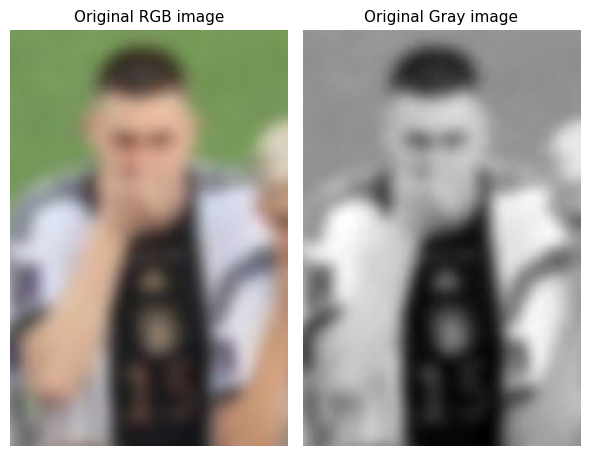

In [3]:
# Getting the image
gray_image, image_RGB = get_image('soccerteam.jpg')

# Getting the player with jersey 15 (for better understanding)
gray_image = gray_image[40:205, 500:610]
image_RGB = image_RGB[40:205, 500:610]

# Displaying the images
display_RGB_n_gray_images(image_RGB, gray_image, size=(6, 9))

<center>Figure- 1: Displaying the imported images in RGB and gray </center>

In [4]:
def sharpen(image, sharpmask):
    """Performs an image sharpening using Laplace filter/unsharpen mask (USM)/Median filter/ High-pass-filter
    1 = Laplace
    2 = USM with sigma 3
    3 = USM with sigma 5
    4 = USM with sigma 7
    10 = USM with sigma 10
    5 = High pass filter with sigma 3
    6 = High pass filter with sigma 5
    7 = High pass filter with sigma 7
    11 = High pass filter with sigma 10
    8 = Median filter with square 3
    9 = Median filter with square 2
    Returns: sharpened image"""

    amount = 3 # weight of sharpening (used in USM)
    sharpened = 0
    if sharpmask == 1:
        filtered = laplace(image)
        sharpened = image - amount*filtered
    elif sharpmask == 2:  #USM with sigma 3
        gaussasian_blur = gaussian(image, sigma=3)
        sharpened = image + amount*(image - gaussasian_blur)
    elif sharpmask == 3:  #USM with sigma 5
        gaussasian_blur = gaussian(image, sigma=5)
        sharpened = image + amount*(image - gaussasian_blur)
    elif sharpmask == 4:  #USM with sigma 7
        gaussasian_blur = gaussian(image, sigma=7)
        sharpened = image + amount*(image - gaussasian_blur)
    elif sharpmask == 10:  #USM with sigma 10
        gaussasian_blur = gaussian(image, sigma=10)
        sharpened = image + amount*(image - gaussasian_blur)
    elif sharpmask == 5:  # High pass with sigma 3
        gaussasian_blur = gaussian(image, sigma=3)
        sharpened = image - gaussasian_blur
    elif sharpmask == 6:  # High pass with sigma 5
        gaussasian_blur = gaussian(image, sigma=5)
        sharpened = image - gaussasian_blur
    elif sharpmask == 7:  # High pass with sigma 7
        gaussasian_blur = gaussian(image, sigma=7)
        sharpened = image - gaussasian_blur
    elif sharpmask == 11:  # High pass with sigma 10
        gaussasian_blur = gaussian(image, sigma=10)
        sharpened = image - gaussasian_blur
    elif sharpmask == 8: # Median with square 3
        sharpened = median(image, np.ones((3, 3)))
    elif sharpmask == 9: # Median with square 2
        sharpened = median(image, np.ones((2, 2)))
    else:
        print("wrong mask")
    return sharpened

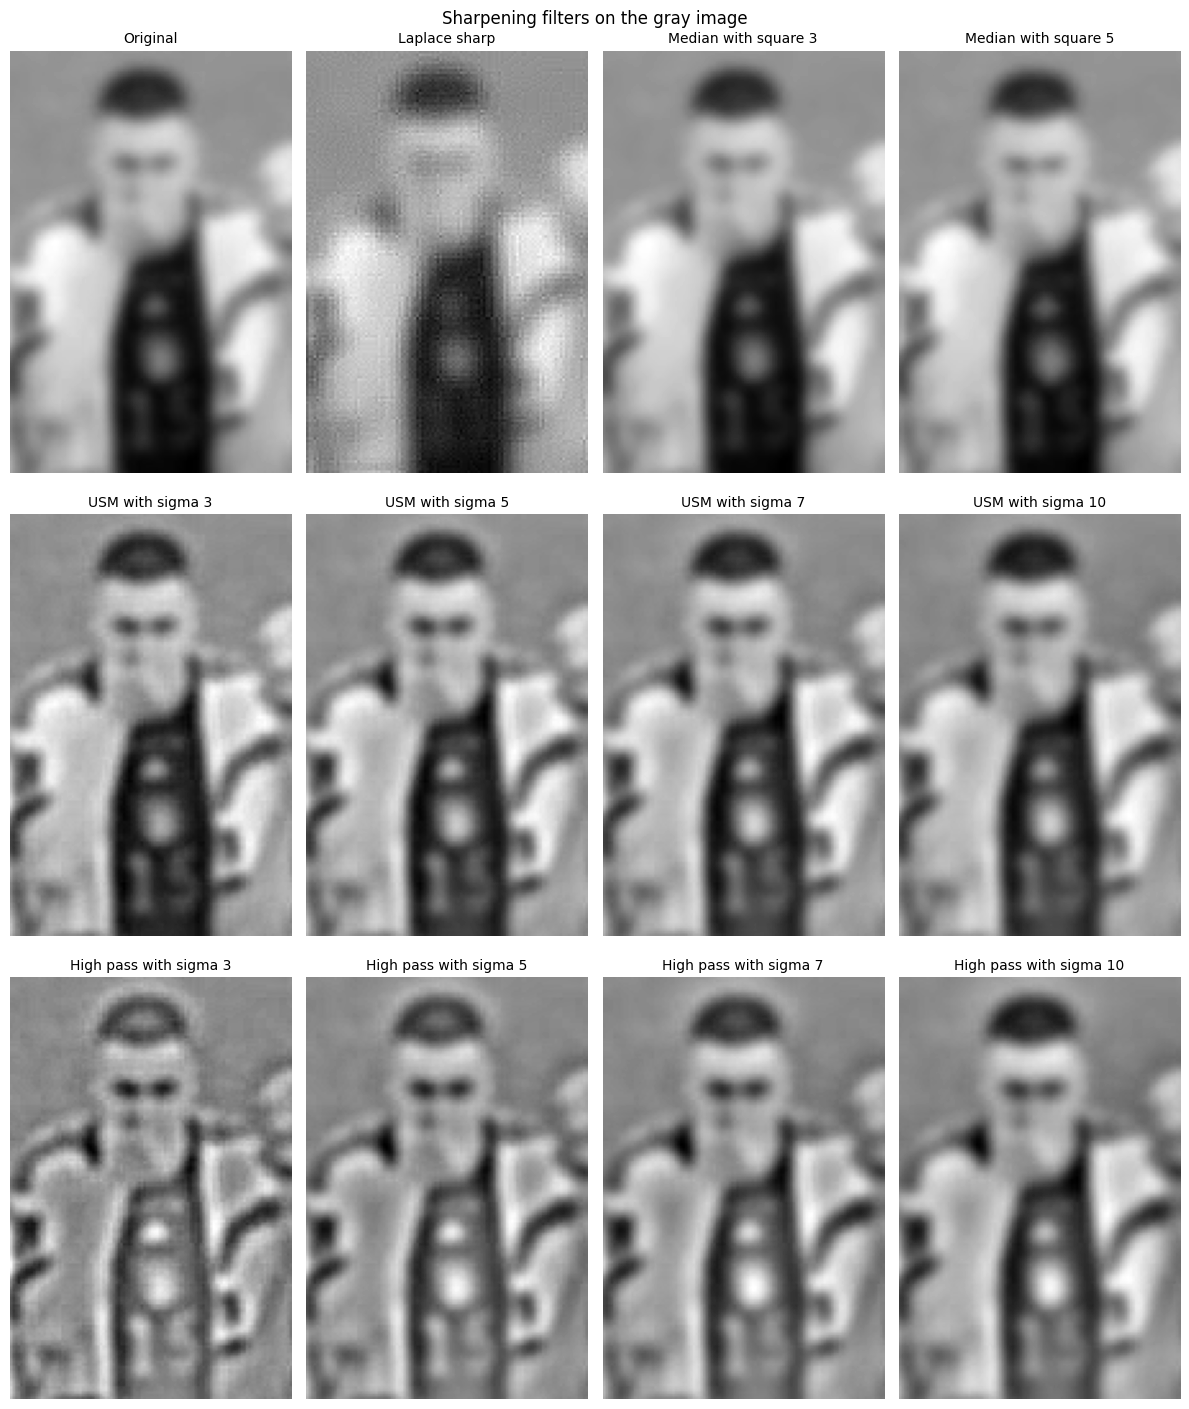

In [5]:
# Calling all the sharpening filters
laplace_sharp = sharpen(gray_image[:,:], 1)

median1 = sharpen(gray_image[:,:], 8) #Median with square 3
median2 = sharpen(gray_image[:,:], 9) #Median with square 2

usm_sharp = sharpen(gray_image[:,:], 2) #USM with sigma 3
usm_sharp2 = sharpen(gray_image[:,:], 3) #USM with sigma 5
usm_sharp3 = sharpen(gray_image[:,:], 4) #USM with sigma 7
usm_sharp4 = sharpen(gray_image[:,:], 10) #USM with sigma 10

high_pass_sharp = sharpen(gray_image[:,:], 5) #High pass with sigma 3
high_pass_sharp2 = sharpen(gray_image[:,:], 6) #High pass with sigma 5
high_pass_sharp3 = sharpen(gray_image[:,:], 7) #High pass with sigma 7
high_pass_sharp4 = sharpen(gray_image[:,:], 11) #High pass with sigma 10


# Displaying the sharpening results
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (12, 14.5))
fig.suptitle("Sharpening filters on the gray image", fontsize = 12)

ax[0, 0].imshow(gray_image, cmap ='gray')
ax[0, 0].set_title('Original', fontsize = 10)

ax[0, 1].imshow(laplace_sharp, cmap ='gray')
ax[0, 1].set_title(r'Laplace sharp', fontsize = 10)

ax[0, 2].imshow(median1, cmap ='gray')
ax[0, 2].set_title('Median with square 3', fontsize = 10)

ax[0, 3].imshow(median2, cmap ='gray')
ax[0, 3].set_title('Median with square 5', fontsize = 10)

ax[1, 0].imshow(usm_sharp, cmap ='gray')
ax[1, 0].set_title(r'USM with sigma 3', fontsize = 10)

ax[1, 1].imshow(usm_sharp2, cmap ='gray')
ax[1, 1].set_title(r'USM with sigma 5', fontsize = 10)

ax[1, 2].imshow(usm_sharp3, cmap ='gray')
ax[1, 2].set_title(r'USM with sigma 7', fontsize = 10)

ax[1, 3].imshow(usm_sharp4, cmap ='gray')
ax[1, 3].set_title(r'USM with sigma 10', fontsize = 10)

ax[2,0].imshow(high_pass_sharp, cmap ='gray')
ax[2,0].set_title(r'High pass with sigma 3', fontsize = 10)

ax[2,1].imshow(high_pass_sharp2, cmap ='gray')
ax[2,1].set_title(r'High pass with sigma 5', fontsize = 10)

ax[2,2].imshow(high_pass_sharp3, cmap ='gray')
ax[2,2].set_title(r'High pass with sigma 7', fontsize = 10)

ax[2,3].imshow(high_pass_sharp4, cmap ='gray')
ax[2,3].set_title(r'High pass with sigma 10', fontsize = 10)
for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

<center>Figure- 2: Sharpening filters on the gray image </center>

### Comment on the effect of filters/masks on the given image:
From the Figure-2, we can understand the following effects of the filters on the given image.
- **Laplace filter**: It had the worst sharpening effect compared to the others. It made the image even noiser by enhancing unwanted edges present in the image.
    
- **Median filter**: Since the pixelation has reduced, the image looks slightly sharpened. But due to smoothing the jersey number had almost disappeared.
    
- **Unsharpened Mask (USM)**: In terms of sharpening and retaining the image quality and contrast, USM seemed to be the best. The jersy number, the hands and the eyes are much more sharpened and visible.
    
- **High pass filter**: It has more defined & highlighted edge detection. But the increased contrast can lose smaller details. For example, the details of the player's shirt.


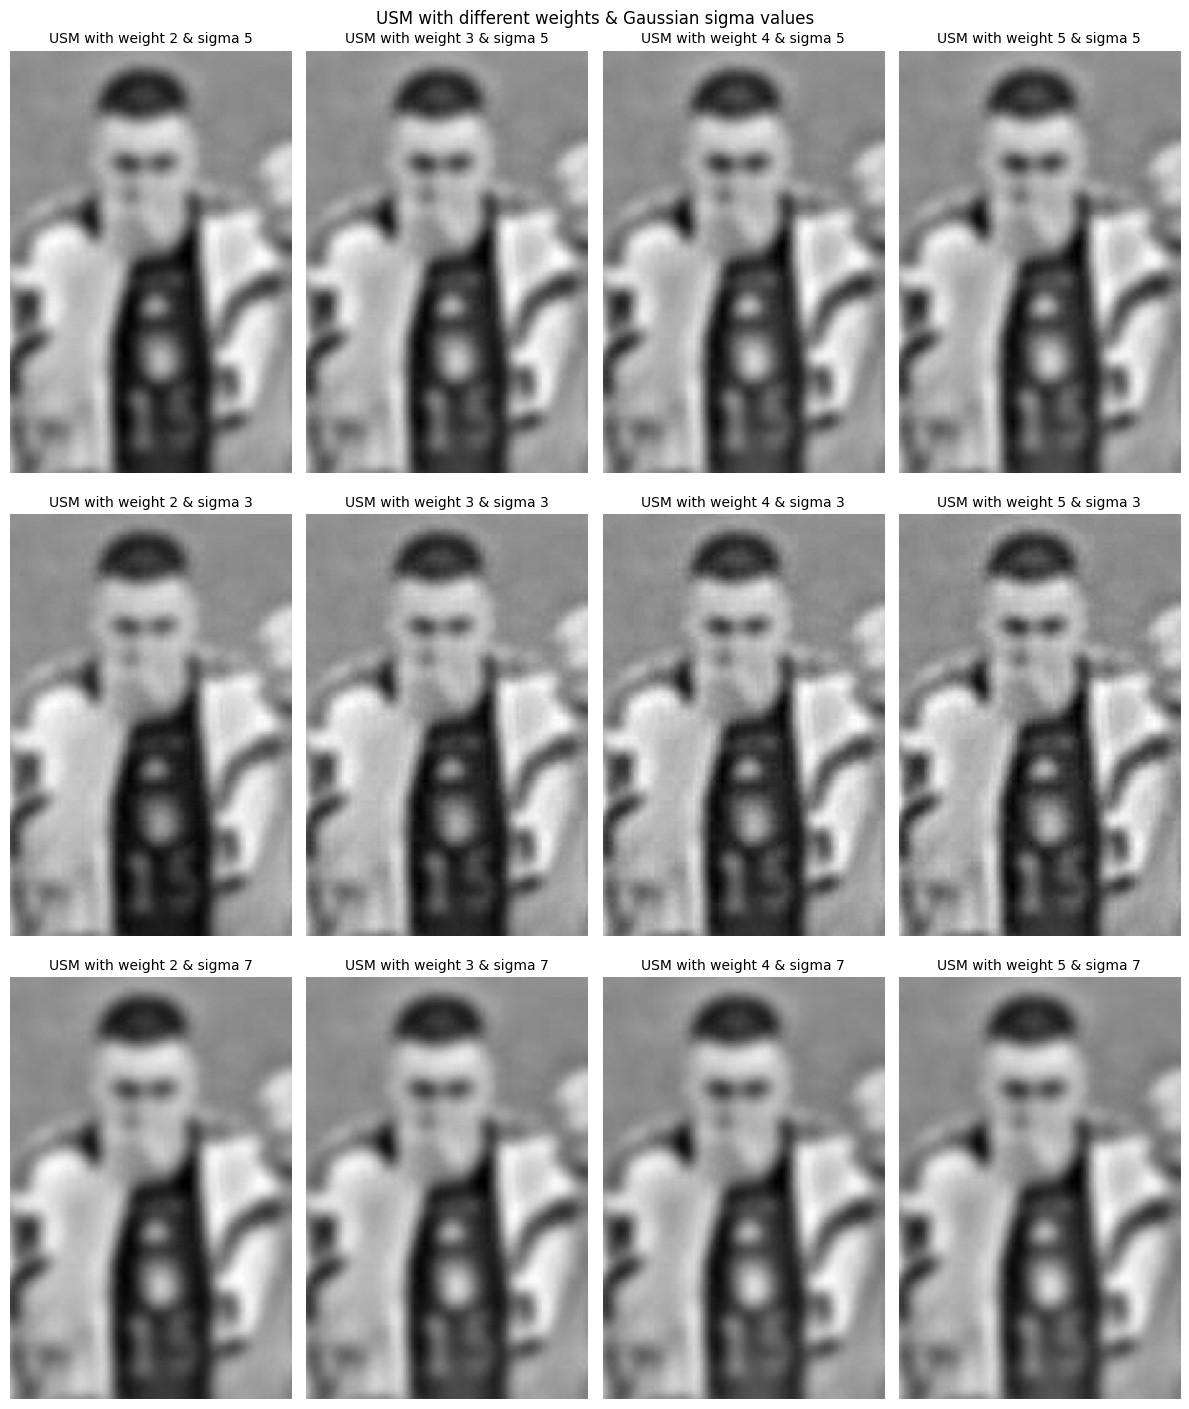

In [6]:
# Analyzing USM with weight 2, 3, 4, 5
image = gray_image.copy()

gaussasian_blur = gaussian(image, sigma=3)
usm_sharp_w222 = image + 2*(image - gaussasian_blur)
usm_sharp_w333 = image + 3*(image - gaussasian_blur)
usm_sharp_w444 = image + 4*(image - gaussasian_blur)
usm_sharp_w555 = image + 5*(image - gaussasian_blur)

gaussasian_blur = gaussian(image, sigma=5)
usm_sharp_w2 = image + 2*(image - gaussasian_blur)
usm_sharp_w3 = image + 3*(image - gaussasian_blur)
usm_sharp_w4 = image + 4*(image - gaussasian_blur)
usm_sharp_w5 = image + 5*(image - gaussasian_blur)

gaussasian_blur = gaussian(image, sigma=7)
usm_sharp_w22 = image + 2*(image - gaussasian_blur)
usm_sharp_w33 = image + 3*(image - gaussasian_blur)
usm_sharp_w44 = image + 4*(image - gaussasian_blur)
usm_sharp_w55 = image + 5*(image - gaussasian_blur)

# Displaying the USM results with different weights and sigma
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (12, 14.5))
fig.suptitle("USM with different weights & Gaussian sigma values", fontsize = 12)

ax[1, 0].imshow(usm_sharp_w222, cmap ='gray')
ax[1, 0].set_title(r'USM with weight 2 & sigma 3', fontsize = 10)

ax[1, 1].imshow(usm_sharp_w333, cmap ='gray')
ax[1, 1].set_title(r'USM with weight 3 & sigma 3', fontsize = 10)

ax[1, 2].imshow(usm_sharp_w444, cmap ='gray')
ax[1, 2].set_title(r'USM with weight 4 & sigma 3', fontsize = 10)

ax[1, 3].imshow(usm_sharp_w555, cmap ='gray')
ax[1, 3].set_title(r'USM with weight 5 & sigma 3', fontsize = 10)

ax[0, 0].imshow(usm_sharp_w2, cmap ='gray')
ax[0, 0].set_title('USM with weight 2 & sigma 5', fontsize = 10)

ax[0, 1].imshow(usm_sharp_w3, cmap ='gray')
ax[0, 1].set_title(r'USM with weight 3 & sigma 5', fontsize = 10)

ax[0, 2].imshow(usm_sharp_w4, cmap ='gray')
ax[0, 2].set_title('USM with weight 4 & sigma 5', fontsize = 10)

ax[0, 3].imshow(usm_sharp_w4, cmap ='gray')
ax[0, 3].set_title('USM with weight 5 & sigma 5', fontsize = 10)

ax[2, 0].imshow(usm_sharp_w22, cmap ='gray')
ax[2, 0].set_title(r'USM with weight 2 & sigma 7', fontsize = 10)

ax[2, 1].imshow(usm_sharp_w33, cmap ='gray')
ax[2, 1].set_title(r'USM with weight 3 & sigma 7', fontsize = 10)

ax[2, 2].imshow(usm_sharp_w44, cmap ='gray')
ax[2, 2].set_title(r'USM with weight 4 & sigma 7', fontsize = 10)

ax[2, 3].imshow(usm_sharp_w44, cmap ='gray')
ax[2, 3].set_title(r'USM with weight 5 & sigma 7', fontsize = 10)

for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

<center>Figure- 3: USM with different weights & Gaussian sigma values </center>

### Comment on the analysis of USM with different weights:
From the Figure-3, I have identified the following patterns.
- Higher the weight, lower the contrast the images have.
- Higher sigma increases the contrast but makes the small details blurry.

**Depending on the context and task, we can choose any appropritate weight and sigma for sharpening the image.**

<a id='E1b'></a>
# <font color='blue '>Exercise 1 (b): Canny filter on sharpened & unsharpened image  <font>

### Canny Filter:
Canny filter is one of the most popular edge detecting filters which works incorporating multiple stages. For applying this filter, the image has to be in the gray scale format. It has three parameters for computing the perfect edges. It uses:

- the Gausian filter with the sigma value controlling the intensity of the smoothing/blurring for getting rid of the noises present in the image.
- the Sobel filter for computing the gradient of the image which involves acquiring the edge intensity and direction.
- the Hysterisis thresholding(min and max) for determining strong and weak edges present in the image. Finally eliminating weak edges without having any link to the strong edges.
    
**Example**: It is used for detecting the roads. Similarly in Exercise 3(f), I have used it for outlining the vegetation present in the image.
   
### Identification of images from the given sample:
From the sample image, we can see that-
- Left image: Canny filter with sigma = 3 has been applied on the *original* image
- Right image: Canny filter with sigma = 3 has been applied on the *sharpened* image

### Displaying the usage of Canny filter with different sigma values:
For displaying the results of canny filter, I have used the original image and the sharpened image. For the sharpened image, I have chosen the USM sharpened image where sigma value 10 has been used for sharpening it.

In [7]:
# Importing the image in gray- scale
gray_image = io.imread('soccerteam.jpg', as_gray = True)

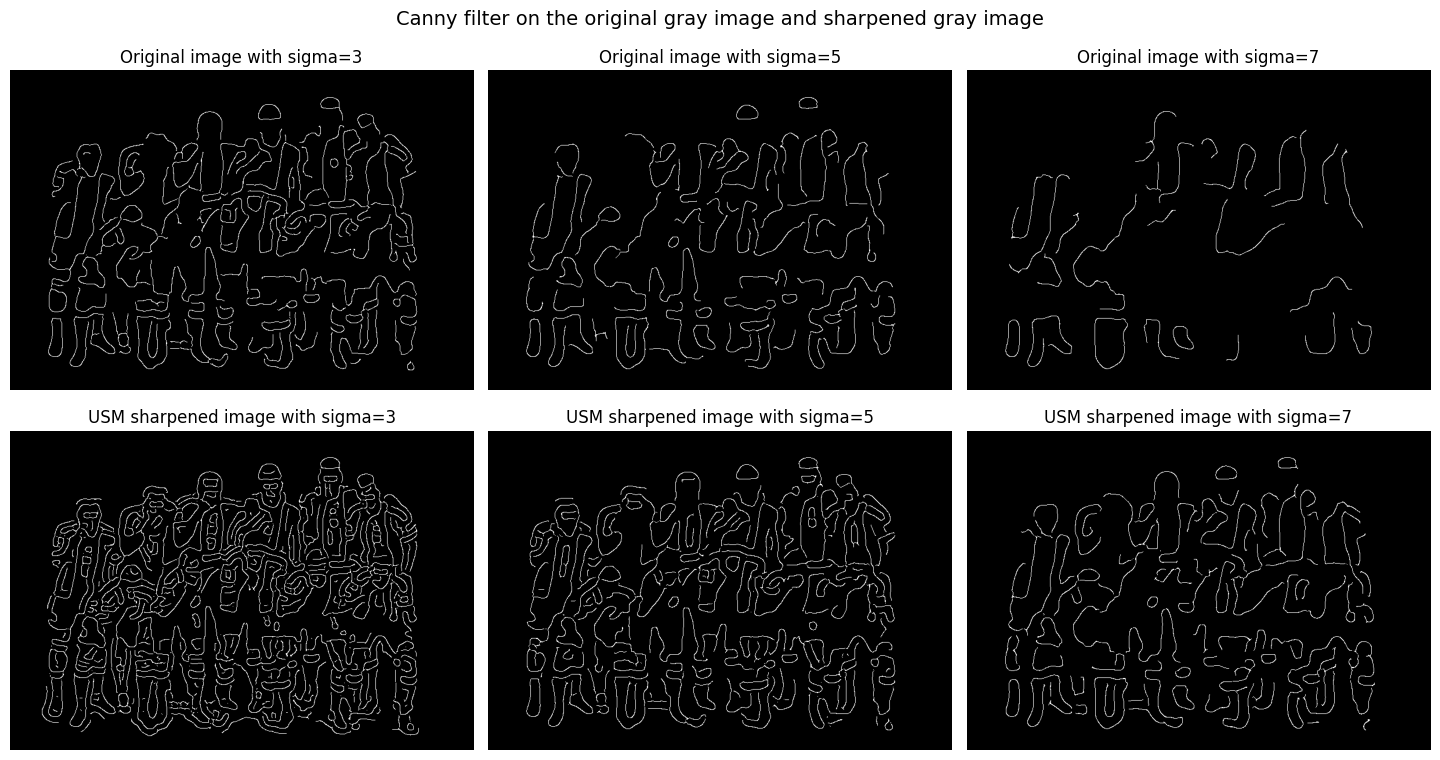

In [8]:
# Canny filter on original gray image
canny_filtered1 = feature.canny(gray_image, sigma = 3)
canny_filtered2 = feature.canny(gray_image, sigma = 5)
canny_filtered3 = feature.canny(gray_image, sigma = 7)

# usm_sharpened image with sigma value 10
usm_sharp2 = sharpen(gray_image[:,:], 3)

# Canny filter on sharpened gray image
canny_filtered_sharped1 = feature.canny(usm_sharp2, sigma = 3)
canny_filtered_sharped2 = feature.canny(usm_sharp2, sigma = 5)
canny_filtered_sharped3 = feature.canny(usm_sharp2, sigma = 7)

# Displaying the canny filtered images
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (14.5, 8))
fig.suptitle("Canny filter on the original gray image and sharpened gray image", fontsize = 14)

ax[0, 0].imshow(canny_filtered1, cmap ='gray')
ax[0, 0].set_title('Original image with sigma=3', fontsize = 12)

ax[0, 1].imshow(canny_filtered2, cmap ='gray')
ax[0, 1].set_title('Original image with sigma=5', fontsize = 12)

ax[0, 2].imshow(canny_filtered3, cmap ='gray')
ax[0, 2].set_title('Original image with sigma=7', fontsize = 12)

ax[1, 0].imshow(canny_filtered_sharped1, cmap ='gray')
ax[1, 0].set_title('USM sharpened image with sigma=3', fontsize = 12)

ax[1, 1].imshow(canny_filtered_sharped2, cmap ='gray')
ax[1, 1].set_title('USM sharpened image with sigma=5', fontsize = 12)

ax[1, 2].imshow(canny_filtered_sharped3, cmap ='gray')
ax[1, 2].set_title('USM sharpened image with sigma=7', fontsize = 12)

for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

<center>Figure- 4: Canny filter on the original gray image and sharpened gray image </center>

### Comment on the Canny filtered images:
From the Figure-4, I have identified the following patterns:
- Since the sharpened image had more defined edges than the unsharpened original image, the canny filtered sharpened images look much more noiser.
- The sigma value we set in the canny filter is used by the Gaussian filter part of it's multiple stages which mainly works for smoothing/blurring/removing the noises present in the image. Hence higher the sigma value, the less the edges are present in the image. This is applicable to both the sharpened and the unsharpened image.